In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
import time

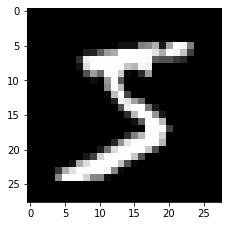

In [5]:
plt.figure(figsize=(16,4));

# image 0
plt.subplot(1, 4, 1);
plt.imshow(X_train[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));

In [6]:
len(X_train)

60000

In [7]:
len(X_train[0]),len(X_train[0][0]), 28*28

(28, 28, 784)

In [8]:
X_train2 = X_train.reshape(60000,784)

In [9]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_train2)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.9904510974884033 seconds


In [10]:
len(X_train2), len(pca_result)

(60000, 60000)

In [11]:
pca_result

array([[ 123.93259858, -312.67394508,  -24.51227283, ...,  159.9278474 ,
        -363.35916597,  198.13040815],
       [1011.71838682, -294.85692425,  596.34013099, ..., -104.90648475,
          40.49138241,  151.01445032],
       [ -51.84961822,  392.17317059, -188.50982054, ...,  368.51133109,
        -114.61301028, -178.34269794],
       ...,
       [-178.053449  ,  160.07824061, -257.61209982, ..., -184.59769037,
         -87.45344333,  267.52514816],
       [ 130.60608299,   -5.59190051,  513.85874176, ...,  140.77757783,
         -16.50322022,  -93.92096271],
       [-173.43593973,  -24.71857375,  556.02000559, ..., -154.10589344,
          87.5739966 , -121.74491482]])

In [12]:
pca_x = [pca_result[i][0] for i in range(0,len(pca_result))]
pca_y = [pca_result[i][1] for i in range(0,len(pca_result))]

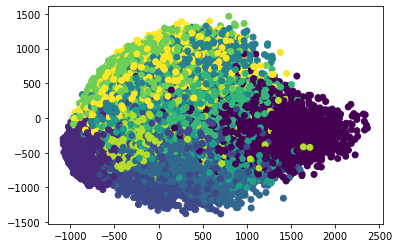

In [15]:
plt.scatter(pca_x, pca_y,c=y_train)

In [16]:
# pca_result

In [17]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tse = TSNE(random_state=44).fit_transform(pca_result[0:10000])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 25.063261032104492 seconds


In [18]:
tse_x = [tse[i][0] for i in range(0,len(tse))]
tse_y = [tse[i][1] for i in range(0,len(tse))]

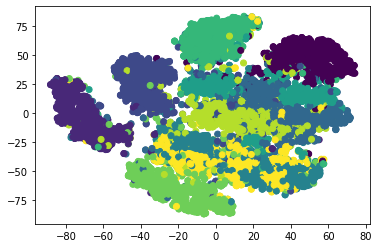

In [19]:
plt.scatter(tse_x, tse_y, c = y_train[0:10000])

In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=9, random_state=42).fit(tse)

In [22]:
y_pred = km.predict(tse)

In [23]:
y_pred

array([4, 2, 0, ..., 5, 0, 6], dtype=int32)

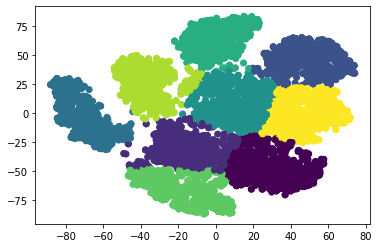

In [24]:
plt.scatter(tse_x, tse_y, c = y_pred)

In [25]:
km.cluster_centers_, km.labels_, 

(array([[ 30.299927  , -47.02829   ],
        [-14.52953   , -30.692047  ],
        [ 48.900345  ,  45.43536   ],
        [-69.85089   ,  -2.5051253 ],
        [  9.103096  ,   8.81914   ],
        [  0.43045795,  63.58839   ],
        [-16.800365  , -66.91158   ],
        [-34.844547  ,  25.915726  ],
        [ 48.29573   ,  -0.6749216 ]], dtype=float32),
 array([4, 2, 0, ..., 5, 0, 6], dtype=int32))

In [26]:
km.inertia_

2969567.75

In [27]:
for i in km.cluster_centers_:
    print(i[0], i[1])

30.299927 -47.02829
-14.52953 -30.692047
48.900345 45.43536
-69.85089 -2.5051253
9.103096 8.81914
0.43045795 63.58839
-16.800365 -66.91158
-34.844547 25.915726
48.29573 -0.6749216


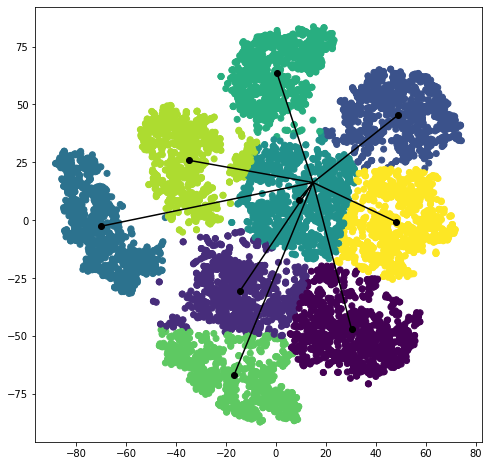

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(tse_x[1:], tse_y[1:], c = y_pred[1:], label=y_pred[1:])

for i in km.cluster_centers_:
    plt.scatter(i[0], i[1], c='k')

#plt.scatter(tse_x[0], tse_y[0], c='red', marker='X', s=500)

for i in km.cluster_centers_:
    plt.plot([i[0],tse_x[0]], [i[1],tse_y[0]], c='k')


In [44]:
bla = []
for i in range(0, len(km.cluster_centers_)):
    print(i, distance.euclidean(tse[0], km.cluster_centers_[i]))
    bla.append(distance.euclidean(tse[0], km.cluster_centers_[i]))

0 65.18997192382812
1 55.45749282836914
2 44.76945877075195
3 86.81098175048828
4 9.47342300415039
5 49.43644714355469
6 89.05821228027344
7 50.65793228149414
8 37.473411560058594


In [99]:
bla

[9.390274047851562,
 63.35190963745117,
 87.76995849609375,
 49.96064376831055,
 45.15130615234375,
 50.614662170410156,
 37.868934631347656,
 89.89769744873047,
 56.8884391784668]

In [48]:
bla = np.array(bla)

In [49]:
bla.sum()

488.32733154296875

In [52]:
j = 0.0
for i in bla:
    j+=(i/bla.sum())*100
    print((i/bla.sum())*100)
print(j)

13.34964637712316
11.356622749977971
9.167919933806248
17.77721133817996
1.9399739462088266
10.123628957517134
18.237400720307022
10.373765507130264
7.673830469749418
100.0


In [ ]:
j = 0.0
for i in bla:
    j+=(i/bla.sum())*100
    print((i/bla.sum())*100)
print(j)

In [107]:
for i in bla:
    print(1 - i/bla.sum())

0.9808710691406762
0.8709458006139665
0.8212037839319899
0.8982251534448055
0.9080222569442526
0.8968928523074013
0.9228571787587991
0.8168693660966564
0.8841125387614523


In [41]:
from scipy.spatial import distance
a = (1, 2)
b = (4, 5)
c = (7, 8)
dst = distance.euclidean(a, b)

In [42]:
distance.euclidean(a, b)

4.242640687119285

In [43]:
distance.euclidean(b, c)

4.242640687119285